# **IMDb EDA and Visualization**

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## **Import File**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDb Movies Dataset/IMDb Movies Dataset.csv")

## **EDA**

In [4]:
df.head(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
0,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365
2,The Lord of the Rings: The Return of the King,2003,PG-13,3h 21min,Adventure; Drama; Fantasy;,17 December 2003 (USA),8.9,1593859,3681
3,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979
4,The Lord of the Rings: The Two Towers,2002,PG-13,2h 59min,Adventure; Drama; Fantasy;,18 December 2002 (USA),8.7,1440188,2559


In [5]:
df.tail(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
1495,Catch-22,1970,R,2h 2min,Comedy; Drama; War;,24 June 1970 (USA),7.1,21424,145
1496,The Great Raid,2005,R,2h 12min,Action; Drama; War;,12 August 2005 (USA),6.7,20965,194
1497,Saints and Soldiers,2003,PG-13,1h 30min,Action; Drama; War;,25 March 2005 (USA),6.7,19730,163
1498,Stop-Loss,2008,R,1h 52min,Drama; War;,28 March 2008 (USA),6.4,19456,102
1499,The Alamo,2004,PG-13,2h 17min,Drama; History; War;,9 April 2004 (USA),6.0,19290,306


In [6]:
df.columns

Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date',
       'rating', 'num_raters', 'num_reviews'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1500 non-null   object 
 1   year          1500 non-null   int64  
 2   movie_rated   1500 non-null   object 
 3   run_length    1500 non-null   object 
 4   genres        1500 non-null   object 
 5   release_date  1500 non-null   object 
 6   rating        1500 non-null   float64
 7   num_raters    1500 non-null   int64  
 8   num_reviews   1500 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 105.6+ KB


In [8]:
df.describe()

,year,rating,num_raters,num_reviews
count,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,2002.632000,7.477600,4.116746e+05,996.054667
std,14.758516,0.725035,3.181686e+05,1009.968589
min,1915.000000,3.500000,1.929000e+04,102.000000
25%,1998.000000,7.000000,1.912445e+05,424.750000
50%,2006.000000,7.600000,3.414520e+05,724.500000
75%,2012.000000,8.000000,5.654030e+05,1223.250000
max,2020.000000,9.300000,2.258845e+06,10279.000000


In [9]:
df[['movie_rated']].describe()

,movie_rated
count,1500
unique,14
top,R
freq,679


In [10]:
df.shape,len(df)

((1500, 9), 1500)

In [14]:
df[['name','genres','rating']].sort_values(by='rating',ascending=False).head(10)

,name,genres,rating
500,The Shawshank Redemption,Drama;,9.3
507,The Godfather,Crime; Drama;,9.2
402,The Godfather,Crime; Drama;,9.2
501,The Dark Knight,Action; Crime; Drama;,9.0
400,The Dark Knight,Action; Crime; Drama;,9.0
521,The Godfather: Part II,Crime; Drama;,9.0
408,The Godfather: Part II,Crime; Drama;,9.0
700,Schindler's List,Biography; Drama; History;,8.9
503,Pulp Fiction,Crime; Drama;,8.9
401,Pulp Fiction,Crime; Drama;,8.9


In [15]:
df=df.rename(columns={'name':'Name',
                   'year':'Year',
                   'movie_rated':'Movie_Rated',
                   'run_length':'Run_length',
                   'genres':'Genres',
                   'release_date':'Release_Date',
                   'rating':'Rating',
                      'num_raters':'Num_Raters',
                      'num_reviews':'Num_Reviews'
                   })

In [16]:
df.columns

Index(['Name', 'Year', 'Movie_Rated', 'Run_length', 'Genres', 'Release_Date',
       'Rating', 'Num_Raters', 'Num_Reviews'],
      dtype='object')

In [17]:
df.dtypes

,0
Name,object
Year,int64
Movie_Rated,object
Run_length,object
Genres,object
Release_Date,object
Rating,float64
Num_Raters,int64
Num_Reviews,int64


In [18]:
df[['Release_Date', 'Country']] = df['Release_Date'].str.extract(r'^(.*?)\s*\((.*?)\)$')

In [19]:
df.head()

,Name,Year,Movie_Rated,Run_length,Genres,Release_Date,Rating,Num_Raters,Num_Reviews,Country
0,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010,8.8,1981675,3820,USA
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001,8.8,1609165,5365,USA
2,The Lord of the Rings: The Return of the King,2003,PG-13,3h 21min,Adventure; Drama; Fantasy;,17 December 2003,8.9,1593859,3681,USA
3,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012,8.4,1470329,2979,USA
4,The Lord of the Rings: The Two Towers,2002,PG-13,2h 59min,Adventure; Drama; Fantasy;,18 December 2002,8.7,1440188,2559,USA


### **Change Run_length to minute**

In [20]:
df[['Hours', 'Minutes']] = df['Run_length'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)min)?')

In [21]:
df['Hours']=pd.to_numeric(df['Hours']).fillna(0)
df['Minutes']=pd.to_numeric(df['Minutes']).fillna(0)

In [22]:
df['Run_length']=df['Hours']*60+df['Minutes']
df.drop(['Hours','Minutes'],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1500 non-null   object 
 1   Year          1500 non-null   int64  
 2   Movie_Rated   1500 non-null   object 
 3   Run_length    1500 non-null   float64
 4   Genres        1500 non-null   object 
 5   Release_Date  1500 non-null   object 
 6   Rating        1500 non-null   float64
 7   Num_Raters    1500 non-null   int64  
 8   Num_Reviews   1500 non-null   int64  
 9   Country       1500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 117.3+ KB


In [24]:
df['Run_length']=df['Run_length'].astype(int)

In [25]:
df.head(5)

,Name,Year,Movie_Rated,Run_length,Genres,Release_Date,Rating,Num_Raters,Num_Reviews,Country
0,Inception,2010,PG-13,148,Action; Adventure; Sci-Fi;,16 July 2010,8.8,1981675,3820,USA
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,178,Action; Adventure; Drama;,19 December 2001,8.8,1609165,5365,USA
2,The Lord of the Rings: The Return of the King,2003,PG-13,201,Adventure; Drama; Fantasy;,17 December 2003,8.9,1593859,3681,USA
3,The Dark Knight Rises,2012,PG-13,164,Action; Adventure;,20 July 2012,8.4,1470329,2979,USA
4,The Lord of the Rings: The Two Towers,2002,PG-13,179,Adventure; Drama; Fantasy;,18 December 2002,8.7,1440188,2559,USA


## **Data Visualization**

<ipython-input-26-c9c0d3ec8608>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_rating.index[:5], y=most_rating.values[:5],palette='viridis')


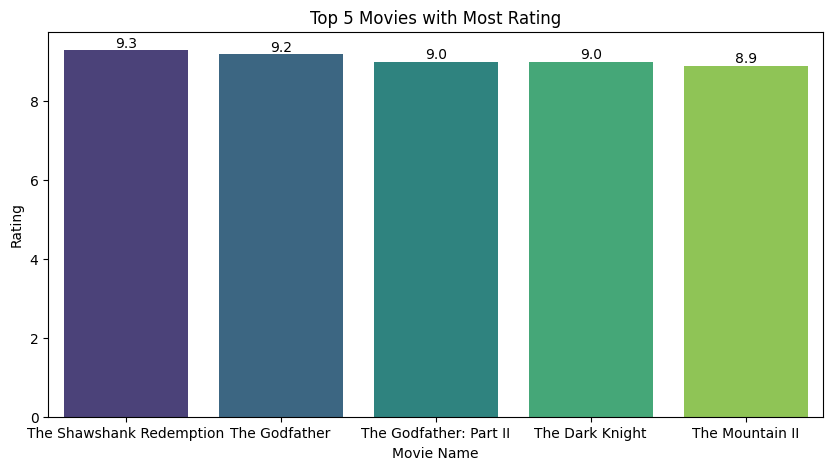

In [26]:
most_rating=df.groupby('Name')['Rating'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=most_rating.index[:5], y=most_rating.values[:5],palette='viridis')
plt.title('Top 5 Movies with Most Rating')
plt.xlabel('Movie Name')
plt.ylabel('Rating')
for i, v in enumerate(most_rating.values[:5]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

<ipython-input-27-698daf15268b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Runtime.index[:5], y=Runtime.values[:5],palette='viridis')


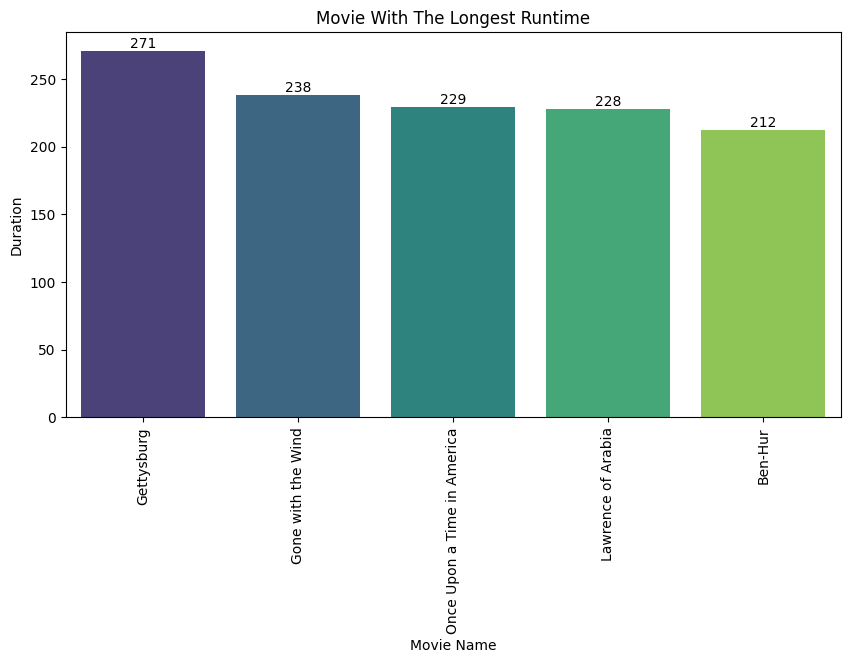

In [27]:
Runtime=df.groupby('Name')['Run_length'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=Runtime.index[:5], y=Runtime.values[:5],palette='viridis')
plt.title('Movie With The Longest Runtime')
plt.xlabel('Movie Name')
plt.ylabel('Duration')
plt.xticks(rotation=90)
for i, v in enumerate(Runtime.values[:5]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [28]:
df['Country'].count()

1500

<ipython-input-29-a1d72afd6144>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="viridis")


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

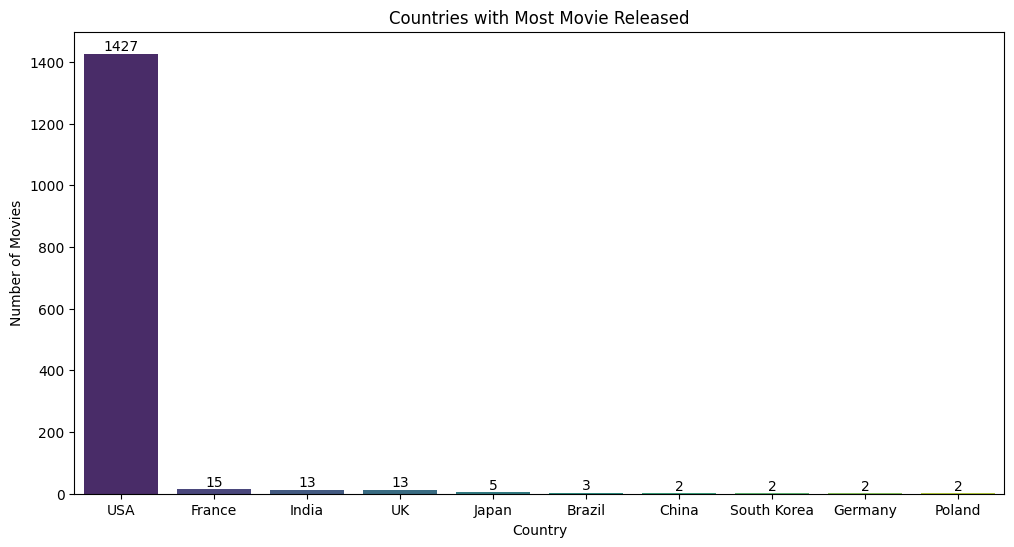

In [29]:
country=df['Country'].value_counts()
top_10_countries=country.head(10)
plt.figure(figsize=(12, 6))
plt.title('Countries with Most Movie Released')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="viridis")
for i, v in enumerate(top_10_countries.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt

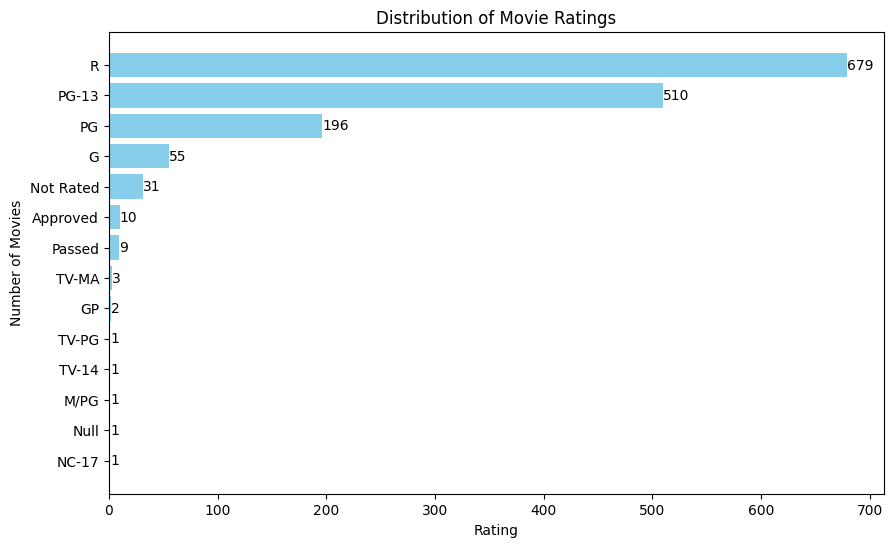

In [30]:
rating_counts=df['Movie_Rated'].value_counts()
rating_counts=rating_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
for i, v in enumerate(rating_counts.values):
    plt.text(v, i, str(v), va='center')
plt.show()

In [31]:
df.head(1)

,Name,Year,Movie_Rated,Run_length,Genres,Release_Date,Rating,Num_Raters,Num_Reviews,Country
0,Inception,2010,PG-13,148,Action; Adventure; Sci-Fi;,16 July 2010,8.8,1981675,3820,USA


<ipython-input-40-d01fda8ae907>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Num_Raters.index[:5], y=Num_Raters.values[:5],palette='viridis')


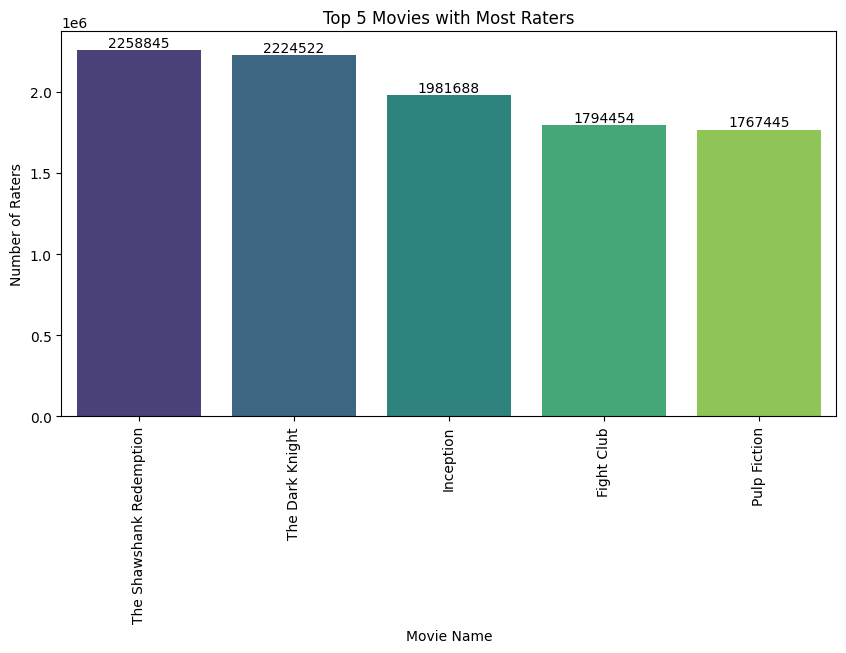

In [40]:
Num_Raters=df.groupby('Name')['Num_Raters'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=Num_Raters.index[:5], y=Num_Raters.values[:5],palette='viridis')
plt.title('Top 5 Movies with Most Raters')
plt.xlabel('Movie Name')
plt.ylabel('Number of Raters')
plt.xticks(rotation=90)
for i, v in enumerate(Num_Raters.values[:5]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()